In [22]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [24]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
crypto_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
crypto_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [6]:
# Generate summary statistics
crypto_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(crypto_df)

In [11]:
# Create a DataFrame with the scaled data
crypto_scaled_df = pd.DataFrame(crypto_scaled, columns=crypto_df.columns, index=crypto_df.index)

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
crypto_scaled_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [46]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
inertia = []
k_values = range(1, 12)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(crypto_scaled_df)
    inertia.append(kmeans.inertia_)
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame


E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Python\Li

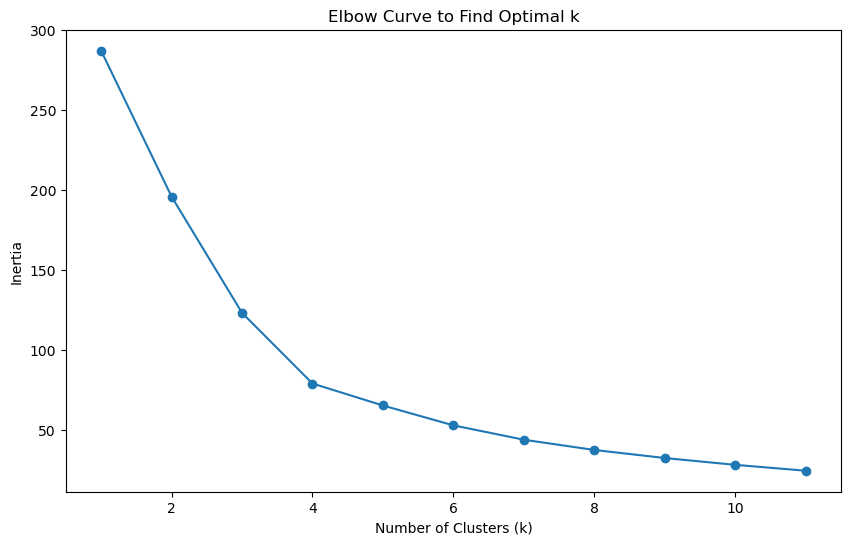

In [40]:
# Plot a line chart with all the inertia values computed with 
plt.figure(figsize=(10,6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Curve to Find Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
# the different values of k to visually identify the optimal value for k.


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [48]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(crypto_scaled_df)

E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [56]:
# Fit the K-Means model using the scaled data

In [58]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = kmeans.predict(crypto_scaled_df)
crypto_clustered_df = crypto_df.copy()
crypto_clustered_df['Cluster'] = crypto_clusters

# View the resulting array of cluster values.


In [60]:
# Create a copy of the DataFrame


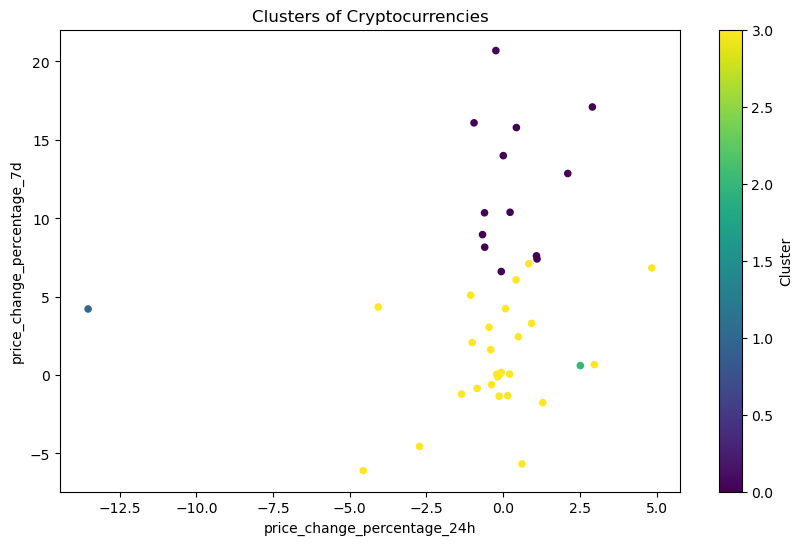

In [62]:
# Add a new column to the DataFrame with the predicted clusters


# Display sample data
crypto_clustered_df.plot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', c='Cluster', colormap='viridis', figsize=(10,6))
plt.title('Clusters of Cryptocurrencies')
plt.show()

In [34]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.


### Optimize Clusters with Principal Component Analysis.

In [64]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled_df)

In [68]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca_df = pd.DataFrame(crypto_pca, columns=['PC1', 'PC2', 'PC3'], index=crypto_df.index)

# View the first five rows of the DataFrame. 
crypto_pca_df.head(5)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [70]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca_explained_variance = pca.explained_variance_ratio_
total_explained_variance = pca_explained_variance.sum()
total_explained_variance

0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Python\Li

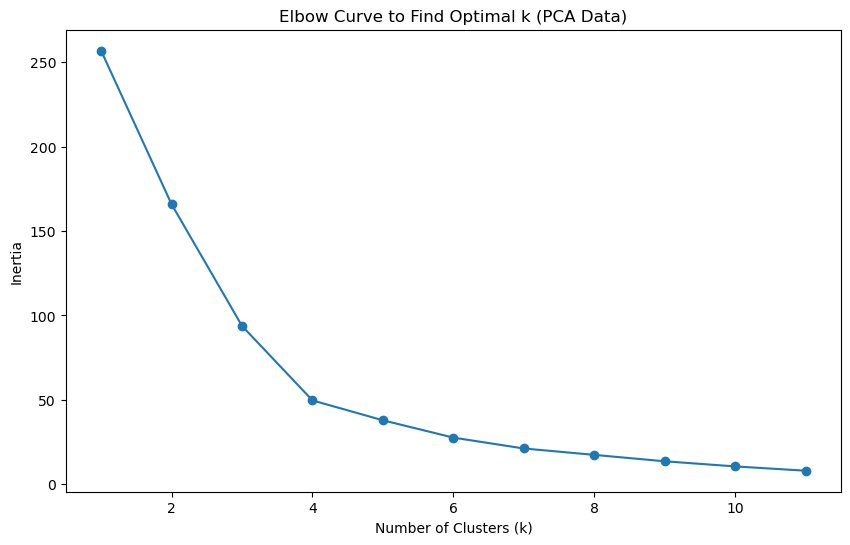

In [76]:
# Create a new DataFrame with the PCA data.
inertia_pca = []
k_values_pca = range(1, 12)

for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(crypto_pca_df)
    inertia_pca.append(kmeans_pca.inertia_)
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
plt.figure(figsize=(10,6))
plt.plot(k_values_pca, inertia_pca, marker='o')
plt.title('Elbow Curve to Find Optimal k (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### Find the Best Value for k Using the PCA Data

In [78]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
inertia_pca = []
k_values_pca = range(1, 12)
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(crypto_pca_df)
    inertia_pca.append(kmeans_pca.inertia_)

# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame


E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Python\Li

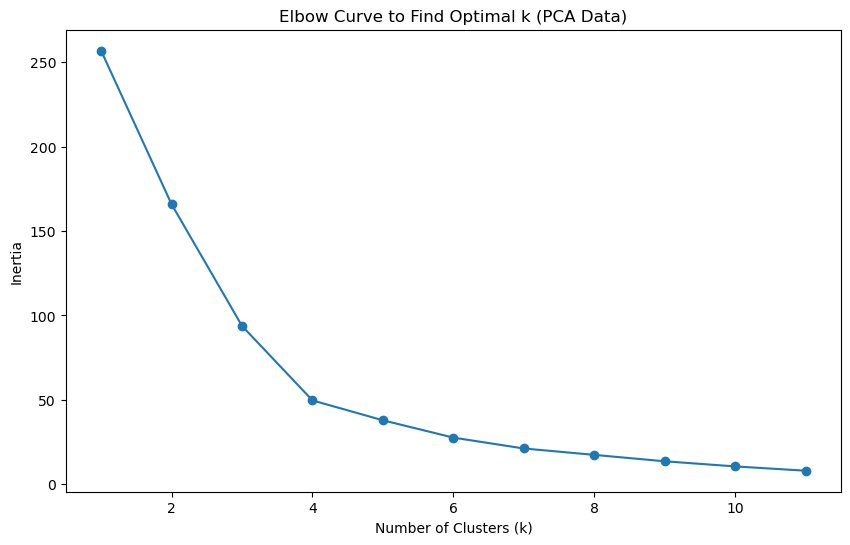

In [80]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10,6))
plt.plot(k_values_pca, inertia_pca, marker='o')
plt.title('Elbow Curve to Find Optimal k (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 11


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, the best value for 𝑘 found using the PCA data is 11, which differs from the typical value found using the original data. From my understanding with most cases, the original data without reduction, the strongest k is often found to be lower, such as 4 or 5, at the point where the elbow occurs and bends.

I theorize that the reduction with PCA has altered the structure of the data, so increasing clusters to an optimal level when using the reduced features. The PCA likely condensed the information, leading to a different clustering behavior, which is why a higher k might be required to adequately capture the clusters in the reduced feature space.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [83]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=0)
kmeans_pca.fit(crypto_pca_df)

E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [ ]:
# Fit the K-Means model using the PCA data


In [85]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters_pca = kmeans_pca.predict(crypto_pca_df)
# Print the resulting array of cluster values.


In [87]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_clustered_df = crypto_pca_df.copy()
crypto_pca_clustered_df['Cluster'] = crypto_clusters_pca

# Add a new column to the DataFrame with the predicted clusters


# Display sample data


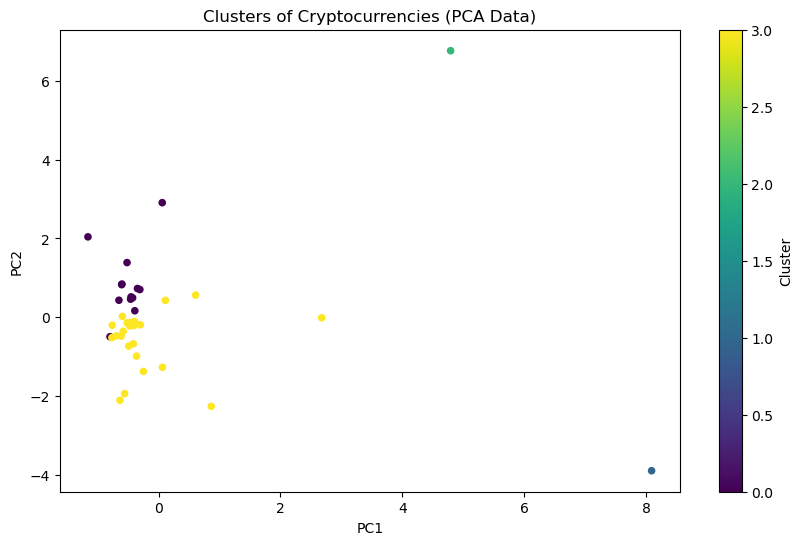

In [89]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
crypto_pca_clustered_df.plot.scatter(x='PC1', y='PC2', c='Cluster', colormap='viridis', figsize=(10,6))
plt.title('Clusters of Cryptocurrencies (PCA Data)')
plt.show()

### Determine the Weights of Each Feature on each Principal Component

In [91]:
# Use the columns from the original scaled DataFrame as the index.
pca_components_df = pd.DataFrame(pca.components_, columns=crypto_df.columns, index=['PC1', 'PC2', 'PC3'])
pca_components_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PC1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PC2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PC3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** PC1 (Principal Component 1)
Strongest Negative Influence: price_change_percentage_24h (-0.417)
Strongest Positive Influence: price_change_percentage_1y (0.568) and price_change_percentage_200d (0.594)
PC2 (Principal Component 2)
Strongest Positive Influence: price_change_percentage_14d (0.540) and price_change_percentage_30d (0.562)
Strongest Negative Influence: price_change_percentage_1y (-0.151)
PC3 (Principal Component 3)
Strongest Positive Influence: price_change_percentage_7d (0.788)
Strongest Negative Influence: price_change_percentage_60d (-0.361)
This shows that the weight which features are most strongly associated with each principal component. For example, in PC1, the long-term price changes have a strong positive influence, while the short-term price change has a strong negative influence. ​
    